YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


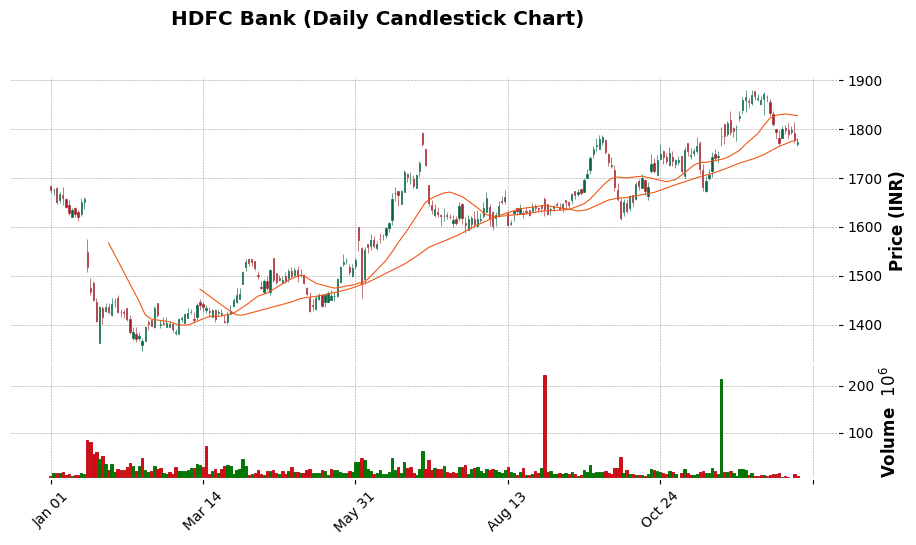

In [3]:
import yfinance as yf
import mplfinance as mpf
from sklearn.preprocessing import StandardScaler

# Load HDFC Bank daily data from NSE
ticker = 'HDFCBANK.NS'
start_date = '2024-01-01'
end_date = '2025-01-01'

data = yf.download(ticker, start=start_date, end=end_date)
data.columns = data.columns.get_level_values(0)

# Plot candlestick chart using mplfinance
mpf.plot(data, type='candle', style='charles', title='HDFC Bank (Daily Candlestick Chart)',
         ylabel='Price (INR)', volume=True, mav=(20, 50), figratio=(16, 8))
data = data.reset_index()

In [4]:
data 

Price,Date,Close,High,Low,Open,Volume
0,2024-01-01,1675.223999,1686.125187,1669.206199,1683.017598,7119843
1,2024-01-02,1676.210571,1679.860799,1665.950651,1675.914685,14621046
2,2024-01-03,1650.363525,1681.735059,1646.466666,1679.071480,14194881
3,2024-01-04,1668.071777,1672.116520,1648.193203,1655.394910,13367028
4,2024-01-05,1659.538208,1681.932477,1645.628180,1664.421596,15944735
...,...,...,...,...,...,...
241,2024-12-24,1798.099976,1808.699951,1789.550049,1802.050049,7242917
242,2024-12-26,1790.750000,1812.000000,1780.750000,1798.550049,5240839
243,2024-12-27,1798.250000,1805.949951,1789.099976,1794.800049,3629665
244,2024-12-30,1777.900024,1815.000000,1771.000000,1792.199951,11111109


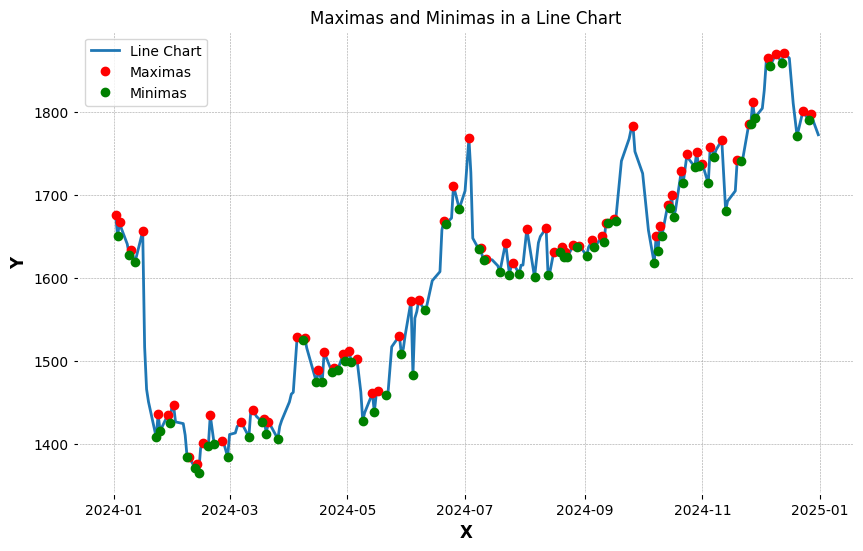

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

x = data['Date']
y = data['Close']

# Find maxima (peaks)
peaks, _ = find_peaks(y)

# Find minima (troughs) by inverting the signal
troughs, _ = find_peaks(-y)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Line Chart')
plt.plot(x[peaks], y[peaks], "ro", label='Maximas')
plt.plot(x[troughs], y[troughs], "go", label='Minimas')
plt.legend()
plt.title('Maximas and Minimas in a Line Chart')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [7]:
maxima = data[['Date','Close']][data['Date'].isin(x[peaks])].sort_values('Date',ascending=False).reset_index(drop=True)
maxima['Date_Timestamp'] = maxima['Date'].astype('int64') // 10**9  # In seconds

# Step 2: Standardize Date and Close
scaler = StandardScaler()
standardized = scaler.fit_transform(maxima[['Date_Timestamp', 'Close']])

# Step 3: Add standardized values back to DataFrame
maxima['Date_std'] = standardized[:, 0].astype(float)
maxima['Close_std'] = standardized[:, 1].astype(float)

maxima 

Price,Date,Close,Date_Timestamp,Date_std,Close_std
0,2024-12-27,1798.250000,1735257600,1.643102,1.367334
1,2024-12-23,1801.000000,1734912000,1.605881,1.387991
2,2024-12-13,1871.750000,1734048000,1.512827,1.919442
3,2024-12-09,1870.000000,1733702400,1.475606,1.906296
4,2024-12-05,1865.750000,1733356800,1.438384,1.874372
...,...,...,...,...,...
61,2024-01-24,1436.286865,1706054400,-1.502112,-1.351611
62,2024-01-16,1656.529419,1705363200,-1.576555,0.302777
63,2024-01-10,1633.641846,1704844800,-1.632387,0.130853
64,2024-01-04,1668.071777,1704326400,-1.688219,0.389479


In [90]:
maxima[['Date_std','Close_std']]

Price,Date_std,Close_std
0,1.643102,1.367334
1,1.605881,1.387991
2,1.512827,1.919442
3,1.475606,1.906296
4,1.438384,1.874372
5,1.363941,1.472874
6,1.345330,1.272312
7,1.289498,0.946681
8,1.215055,1.127337
9,1.159223,1.063863


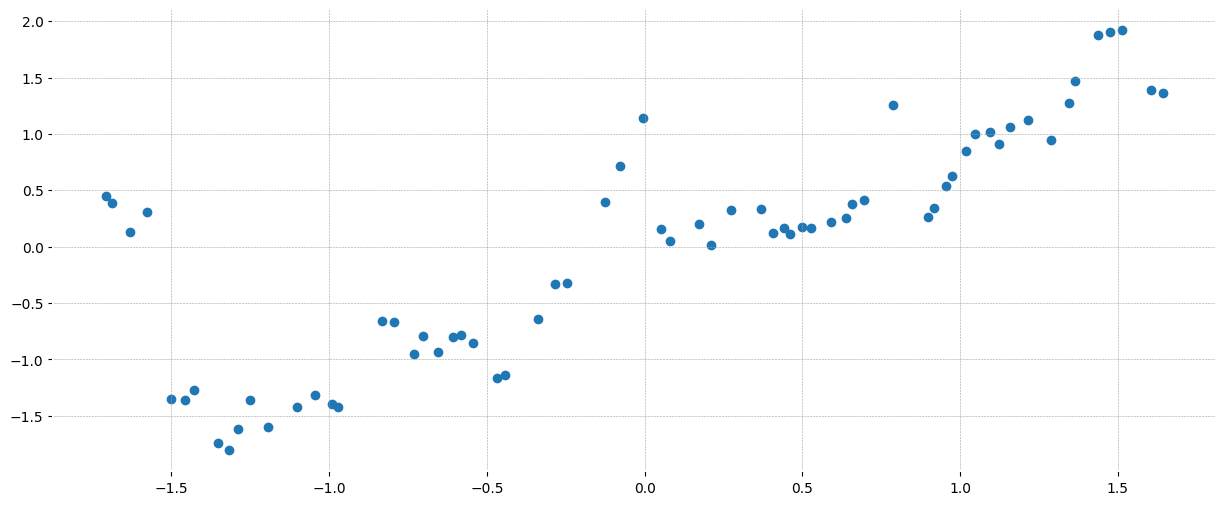

In [8]:
plt.figure(figsize=(15, 6)) 
plt.scatter(maxima['Date_std'], maxima['Close_std'], label='Scatter')

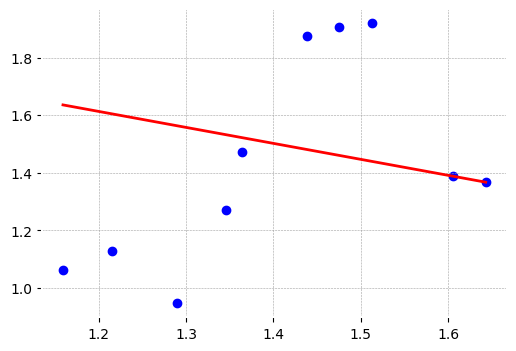

In [38]:
import matplotlib.pyplot as plt

maxima = maxima.head(10)

x, y = list(maxima['Date_std']), list(maxima['Close_std'])

# Compute slope and intercept
m = (y[1] - y[0]) / (x[1] - x[0])
c = y[0] - m * x[0]

x_vals = np.array(x)
y_vals = m * x_vals + c

# Plot the points and the line
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, 'r-', label='Line through A and B')
plt.scatter(x, y, color='blue', label='Points A & B')
plt.show()


In [53]:
y_ = m*x[2]+c 
y_

1.4396340796637181

In [41]:
trend_line_df = pd.DataFrame()
trend_line_df['x'] = x_vals
trend_line_df['y'] = y_vals

std_y = np.std(y)

trend_line_df['y_lower'] = y - 1*std_y
trend_line_df['y_upper'] = y + 1*std_y

trend_line_df

,x,y,y_lower,y_upper
0,1.643102,1.367334,1.027425,1.707244
1,1.605881,1.387991,1.048082,1.727901
2,1.512827,1.439634,1.579532,2.259351
3,1.475606,1.460291,1.566387,2.246205
4,1.438384,1.480948,1.534462,2.214281
5,1.363941,1.522262,1.132964,1.812783
6,1.345330,1.532591,0.932402,1.612221
7,1.289498,1.563577,0.606772,1.286590
8,1.215055,1.604891,0.787428,1.467246
9,1.159223,1.635876,0.723954,1.403772


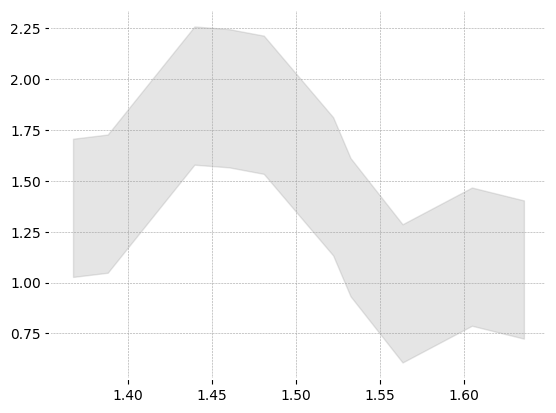

In [ ]:
plt.fill_between(x_vals, trend_line_df['y_lower'], trend_line_df['y_upper'] , alpha=0.2, color='gray')

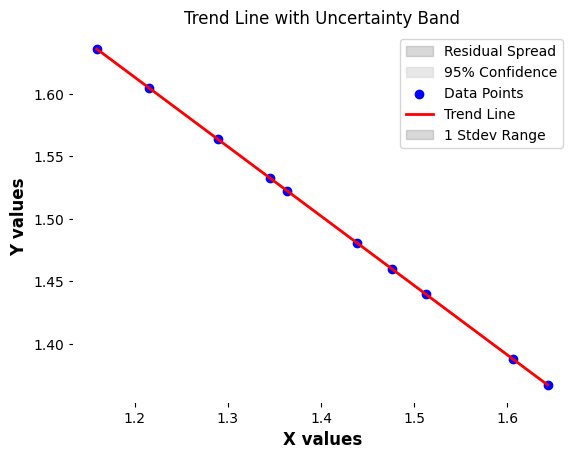

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Extract x and y values
x = trend_line_df["x"]
y = trend_line_df["y"]

# Compute the best-fit line
m, c = np.polyfit(x, y, 1)  # Linear regression
y_fit = m * x + c


# Calculate residuals (differences between actual y and fitted y)
residuals = y - y_fit

# Compute standard deviation of residuals
std_residuals = np.std(residuals)

# Define spread boundaries
y_upper = y_fit + std_residuals
y_lower = y_fit - std_residuals


import scipy.stats as stats

# Standard error of the regression
n = len(x)
stderr = std_residuals / np.sqrt(n)

# Compute margin of error for 95% confidence
margin_error = stats.t.ppf(0.975, df=n-2) * stderr

# Define confidence boundaries
y_upper_conf = y_fit + margin_error
y_lower_conf = y_fit - margin_error

plt.fill_between(x, y_lower, y_upper, color='gray', alpha=0.3, label="Residual Spread")
plt.fill_between(x, y_lower_conf, y_upper_conf, color='lightgray', alpha=0.5, label="95% Confidence")


# Plot data points and trend line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, y_fit, color="red", label="Trend Line")

# Add shaded area for ±1 standard deviation
plt.fill_between(x, y_lower, y_upper, color='gray', alpha=0.3, label="1 Stdev Range")

# Labels and formatting
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Trend Line with Uncertainty Band")
plt.legend()
plt.grid()
plt.show()
